# Student mental health survey dataset

In [1]:
import csv
import pandas as pd
filename=r'C:\Users\lora.maillard\OneDrive - De Vinci\Documents\ESILV\Informatique\S5\Data science\Final project\students_mental_health_survey.csv'
# Ouvrir un fichier CSV en mode lecture
with open(filename, 'r') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)

df = pd.read_csv(filename)
df=df.dropna()
df=df.reset_index(drop=True)
df.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
4,21,Medical,Female,3.35,2,4,3,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus


Now we have to convert categorical responses to numeric values to be able to analyze the data.

In [2]:
for i in ['Family_History','Chronic_Illness']:
    df[i] = df[i].replace({'Yes':1,'No':0})
for i in ['Physical_Activity','Social_Support','Extracurricular_Involvement']:
    df[i] = df[i].replace({'Low':1,'Moderate':2,'High':3})
for i in ['Sleep_Quality','Diet_Quality']:
    df[i] = df[i].replace({'Poor':1,'Average':2,'Good':3})
for i in ['Substance_Use','Counseling_Service_Use']:
    df[i] = df[i].replace({'Never':0,'Occasionally':1,'Frequently':2})
df['Course']=df['Course'].map(df['Course'].value_counts(normalize=True))
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
df['Relationship_Status'].value_counts(normalize=True)
df['Relationship_Status']=df['Relationship_Status'].map(df['Relationship_Status'].value_counts(normalize=True))
df['Residence_Type']=df['Residence_Type'].map(df['Residence_Type'].value_counts(normalize=True))

df

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,0.102073,1,3.56,3,3,2,3,2,3,2,0.194996,0,0,0,0,2,2,17,0.401001
1,24,0.152538,0,2.44,0,3,0,2,1,2,1,0.509221,1,1,0,0,3,1,27,0.401001
2,19,0.102216,0,3.74,4,0,3,3,1,2,2,0.295783,0,1,0,0,4,3,15,0.401001
3,18,0.102216,1,3.40,3,3,4,3,1,2,3,0.194996,0,0,0,1,0,3,23,0.401001
4,21,0.299643,0,3.35,2,4,3,3,2,3,3,0.509221,0,0,0,0,5,2,19,0.396569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,20,0.197427,0,3.33,1,1,1,2,1,2,2,0.295783,0,1,0,0,3,2,29,0.396569
6991,20,0.197427,0,3.69,3,1,5,3,1,1,3,0.509221,0,2,1,0,1,3,26,0.396569
6992,24,0.299643,0,3.73,3,4,1,3,2,2,3,0.509221,0,1,0,0,3,1,15,0.396569
6993,26,0.102073,1,3.65,4,5,1,3,3,1,2,0.194996,0,1,0,1,4,2,17,0.396569


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6995 entries, 0 to 6994
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6995 non-null   int64  
 1   Course                       6995 non-null   float64
 2   Gender                       6995 non-null   int64  
 3   CGPA                         6995 non-null   float64
 4   Stress_Level                 6995 non-null   int64  
 5   Depression_Score             6995 non-null   int64  
 6   Anxiety_Score                6995 non-null   int64  
 7   Sleep_Quality                6995 non-null   int64  
 8   Physical_Activity            6995 non-null   int64  
 9   Diet_Quality                 6995 non-null   int64  
 10  Social_Support               6995 non-null   int64  
 11  Relationship_Status          6995 non-null   float64
 12  Substance_Use                6995 non-null   int64  
 13  Counseling_Service

# Predictive Modeling

In the following parts, we will try to predict stress levels and depression or anxiety scores based on other features in the dataset.

**Neural network to predict mental health issues**

In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame with features and target variables
targets = ['Stress_Level', 'Anxiety_Score', 'Depression_Score']

# Create features (X) and targets (y)
X = df.drop(targets, axis=1)
y = df[targets]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(targets), activation='linear'),  # Use linear activation for regression
    #tf.keras.layers.Dense(len(targets), activation='sigmoid')  
    ])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=0)


**Visualization of the loss and accuracy**

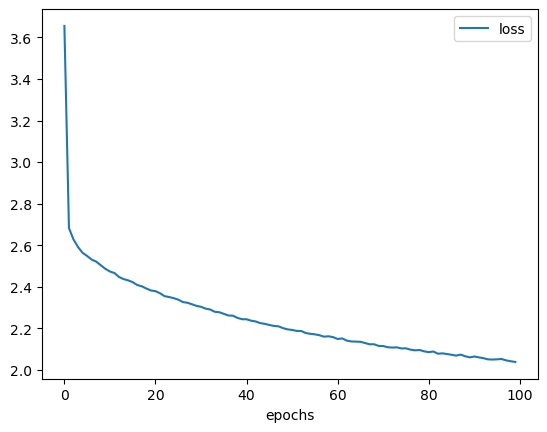

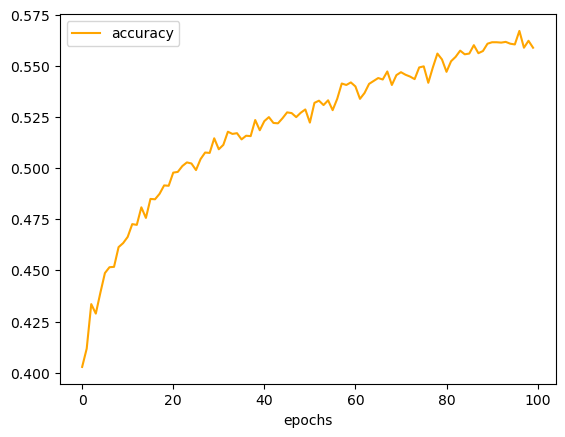

In [17]:
import matplotlib.pyplot as plt 

# Showing plot for loss
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.legend(['loss'])
plt.show()
 
# Showing plot for accuracy
plt.plot(history.history['accuracy'], color='orange')
plt.xlabel('epochs')
plt.legend(['accuracy'])
plt.show()
 

**Prediction on new data**

In [18]:
import numpy as np
df1=df.drop(['Stress_Level', 'Anxiety_Score', 'Depression_Score'],axis=1)
test=df1.iloc[6990]
new_data = np.array([test])
new_data

array([[20.        ,  0.19742673,  0.        ,  3.33      ,  2.        ,
         1.        ,  2.        ,  2.        ,  0.2957827 ,  0.        ,
         1.        ,  0.        ,  0.        ,  3.        ,  2.        ,
        29.        ,  0.39656898]])

In [19]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

# Make predictions
predictions = model.predict(new_data)

# Access individual predictions for each target variable
predicted_stress_level = predictions[:, 0]
predicted_anxiety_score = predictions[:, 1]
predicted_depression_score = predictions[:, 2]
print(predicted_stress_level)
print(predicted_anxiety_score)
print(predicted_depression_score)

44/44 [==============================] - 0s 1ms/step - loss: 2.9947 - accuracy: 0.4289
Mean Squared Error on Test Set: [2.9947404861450195, 0.4288777709007263]
1/1 [==============================] - 0s 76ms/step
[1.3566704]
[8.862065]
[13.921963]


# Random Forest Regression

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Replace NaN values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Choose features and target variable
features = df.drop(['Anxiety_Score', 'Stress_Level', 'Depression_Score'], axis=1)
target_anxiety = df['Anxiety_Score']
target_stress = df['Stress_Level']
target_depression = df['Depression_Score']

# Split the data
X_train, X_test, y_train_anxiety, y_test_anxiety = train_test_split(features, target_anxiety, test_size=0.2, random_state=42)
X_train, X_test, y_train_stress, y_test_stress = train_test_split(features, target_stress, test_size=0.2, random_state=42)
X_train, X_test, y_train_depression, y_test_depression = train_test_split(features, target_depression, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model_anxiety = RandomForestRegressor(n_estimators=100, random_state=42)
model_anxiety.fit(X_train, y_train_anxiety)

model_stress = RandomForestRegressor(n_estimators=100, random_state=42)
model_stress.fit(X_train, y_train_stress)

model_depression = RandomForestRegressor(n_estimators=100, random_state=42)
model_depression.fit(X_train, y_train_depression)

# Make predictions
pred_anxiety = model_anxiety.predict(X_test)
pred_stress = model_stress.predict(X_test)
pred_depression = model_depression.predict(X_test)

# Evaluate the models using Mean Squared Error
mse_anxiety = mean_squared_error(y_test_anxiety, pred_anxiety)
mse_stress = mean_squared_error(y_test_stress, pred_stress)
mse_depression = mean_squared_error(y_test_depression, pred_depression)

print(f"Mean Squared Error (Anxiety): {mse_anxiety}")
print(f"Mean Squared Error (Stress): {mse_stress}")
print(f"Mean Squared Error (Depression): {mse_depression}")


Mean Squared Error (Anxiety): 2.566791779842745
Mean Squared Error (Stress): 2.551998641887062
Mean Squared Error (Depression): 2.4930431022158683


In [9]:
# Assuming `new_case` is a DataFrame containing feature values for the new case
new_case = new_data
# Use the trained models to predict anxiety, stress, and depression
predicted_anxiety = model_anxiety.predict(new_case)
predicted_stress = model_stress.predict(new_case)
predicted_depression = model_depression.predict(new_case)

print(f"Predicted Stress: {predicted_stress}")
print(f"Predicted Depression: {predicted_depression}")
print(f"Predicted Anxiety: {predicted_anxiety}")


Predicted Stress: [1.6]
Predicted Depression: [1.96]
Predicted Anxiety: [3.08]


C:\Users\lora.maillard\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\lora.maillard\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\lora.maillard\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Classification

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support

from scipy.stats import mannwhitneyu



features=['Relationship_Status', 'Age', 'Course', 'Physical_Activity']
targets = ['Stress_Level', 'Anxiety_Score', 'Depression_Score']
target=['Stress_Level']
# Create features (X) and targets (y)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC()
}
from sklearn.metrics import precision_recall_fscore_support
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")

performance_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision_0', 'Precision_1', 'Recall_0', 'Recall_1', 'F1-score_0', 'F1-score_1'])

performance_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision_0', 'Precision_1', 'Recall_0', 'Recall_1', 'F1-score_0', 'F1-score_1'])

Model: Decision Tree
Accuracy: 0.20800571837026446
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.35      0.26       208
           1       0.20      0.23      0.21       261
           2       0.18      0.14      0.16       248
           3       0.20      0.15      0.17       284
           4       0.27      0.29      0.28       195
           5       0.17      0.11      0.14       203

    accuracy                           0.21      1399
   macro avg       0.21      0.21      0.20      1399
weighted avg       0.20      0.21      0.20      1399


Model: Logistic Regression
Accuracy: 0.19799857040743388
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.13      0.15       208
           1       0.17      0.08      0.11       261
           2       0.20      0.23      0.21       248
           3       0.20      0.30      0.24       284
           4       0.23      0.

C:\Users\lora.maillard\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lora.maillard\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lora.maillard\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

Model: Support Vector Machine
Accuracy: 0.20014295925661185
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       208
           1       0.00      0.00      0.00       261
           2       0.14      0.04      0.06       248
           3       0.20      0.95      0.34       284
           4       0.00      0.00      0.00       195
           5       0.00      0.00      0.00       203

    accuracy                           0.20      1399
   macro avg       0.06      0.17      0.07      1399
weighted avg       0.07      0.20      0.08      1399




C:\Users\lora.maillard\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lora.maillard\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lora.maillard\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\lora.maillard\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lora.maillard\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lora.maillard\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

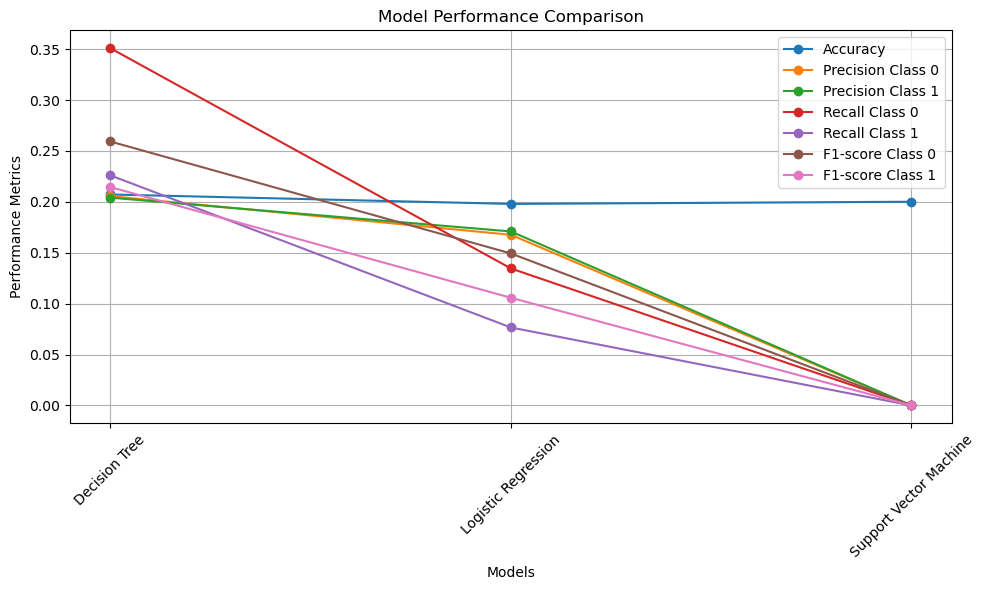

Performance Metrics for Models:
                    Model  Accuracy  Precision_0  Precision_1  Recall_0  \
0           Decision Tree  0.207291     0.205634     0.204152  0.350962   
0     Logistic Regression  0.197999     0.167665     0.170940  0.134615   
0  Support Vector Machine  0.200143     0.000000     0.000000  0.000000   

   Recall_1  F1-score_0  F1-score_1  
0  0.226054    0.259325    0.214545  
0  0.076628    0.149333    0.105820  
0  0.000000    0.000000    0.000000  


In [11]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, predictions, average=None)
    
    performance_df = pd.concat([performance_df, pd.DataFrame({
        'Model': [name],
        'Accuracy': [accuracy],
        'Precision_0': [precision[0]],
        'Precision_1': [precision[1]],
        'Recall_0': [recall[0]],
        'Recall_1': [recall[1]],
        'F1-score_0': [fscore[0]],
        'F1-score_1': [fscore[1]]
    })])
plt.figure(figsize=(10, 6))

plt.plot(performance_df['Model'], performance_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(performance_df['Model'], performance_df['Precision_0'], marker='o', label='Precision Class 0')
plt.plot(performance_df['Model'], performance_df['Precision_1'], marker='o', label='Precision Class 1')
plt.plot(performance_df['Model'], performance_df['Recall_0'], marker='o', label='Recall Class 0')
plt.plot(performance_df['Model'], performance_df['Recall_1'], marker='o', label='Recall Class 1')
plt.plot(performance_df['Model'], performance_df['F1-score_0'], marker='o', label='F1-score Class 0')
plt.plot(performance_df['Model'], performance_df['F1-score_1'], marker='o', label='F1-score Class 1')
plt.xlabel('Models')
plt.ylabel('Performance Metrics')
plt.title('Model Performance Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Creating a table
print("Performance Metrics for Models:")
print(performance_df)


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming df is your DataFrame
# df = pd.read_csv("your_dataset.csv")

# Drop unnecessary columns for the current task
df = df[['Age', 'Gender', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Sleep_Quality']]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into features (X) and target (y)
X = df_imputed.drop('Stress_Level', axis=1)
y = df_imputed['Stress_Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2.665772258104961


**Feature Importance Analysis:**

Identify which features contribute the most to stress levels, depression scores, or anxiety scores.